In [1]:
import os
os.environ['THEANO_FLAGS']='device=gpu'

import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

#my functions
from utils import load_data,my_keras_cv_predict

#go to working directory
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.
Using gpu device 0: GeForce GTX 670 (CNMeM is disabled, CuDNN 4007)
/mnt/Data1/ribli/tools/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
x,y=load_data(hla_representation='one-hot',seq_representation='blosum')

Reading from file...
Creating representation...
Using  83751 data points
Done, It took: 3.52402210236 s


### Create functions for cross validation

In [3]:
#create a very simple deepish model
from keras.models import Sequential
from keras.layers import Dense

def get_model(input_dim):
    """Creates Keras model needed."""
    model = Sequential()
    model.add(Dense(1024, input_dim=input_dim,activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss='mse', optimizer='adam')
    return model

#train
y_pred=my_keras_cv_predict(get_model,x,y,n_folds=5,patience=10,verbose=2)

#note that this needs much more training time than the one hot encoded

Train on 60300 samples, validate on 6700 samples
Epoch 1/100
2s - loss: 1.7229 - val_loss: 1.9580
Epoch 00000: val_loss improved from inf to 1.95796, saving model to best_model
Epoch 2/100
2s - loss: 1.4469 - val_loss: 1.6330
Epoch 00001: val_loss improved from 1.95796 to 1.63305, saving model to best_model
Epoch 3/100
2s - loss: 1.3698 - val_loss: 1.3660
Epoch 00002: val_loss improved from 1.63305 to 1.36601, saving model to best_model
Epoch 4/100
2s - loss: 1.3109 - val_loss: 1.3235
Epoch 00003: val_loss improved from 1.36601 to 1.32347, saving model to best_model
Epoch 5/100
2s - loss: 1.2667 - val_loss: 1.3461
Epoch 00004: val_loss did not improve
Epoch 6/100
2s - loss: 1.2059 - val_loss: 1.4612
Epoch 00005: val_loss did not improve
Epoch 7/100
2s - loss: 1.1905 - val_loss: 1.1828
Epoch 00006: val_loss improved from 1.32347 to 1.18278, saving model to best_model
Epoch 8/100
2s - loss: 1.1526 - val_loss: 1.1755
Epoch 00007: val_loss improved from 1.18278 to 1.17545, saving model to 

Correlation: (0.71149732419367873, 0.0)


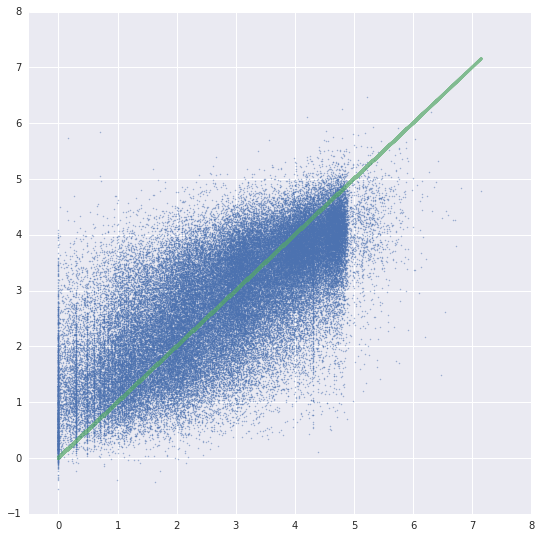

In [4]:
# check correlation
plt.figure(figsize=(9,9))
plt.plot(y,y_pred,'.',ms=3,alpha=0.5)
plt.plot(y,y,lw=3,alpha=0.7)
plt.xlim(xmin=-0.5)
from scipy.stats import pearsonr
print 'Correlation:',pearsonr(y,y_pred)

### Error depending on the length of peptid

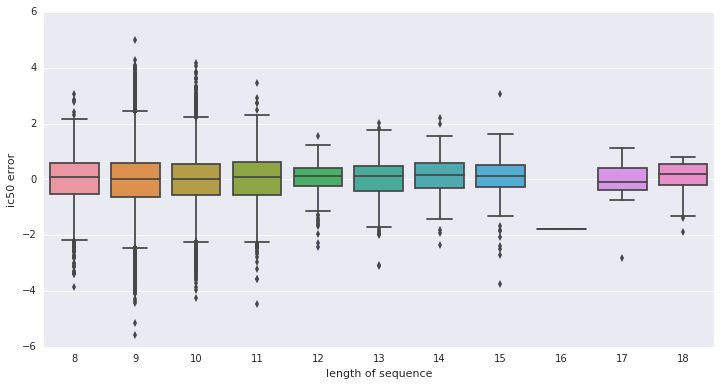

In [5]:
leng=x[:,-1]
plt.figure(figsize=(12,6))
sns.boxplot(leng,y-y_pred)
plt.xlabel('length of sequence')
dump=plt.ylabel('ic50 error')